In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
warnings.filterwarnings('ignore')
from sklearn.metrics import log_loss

data = pd.read_csv(r"C:\Users\yhabib002\Downloads\Data_vis\Dataset6.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284785 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284796 non-null  float64
 19  V19     284796 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


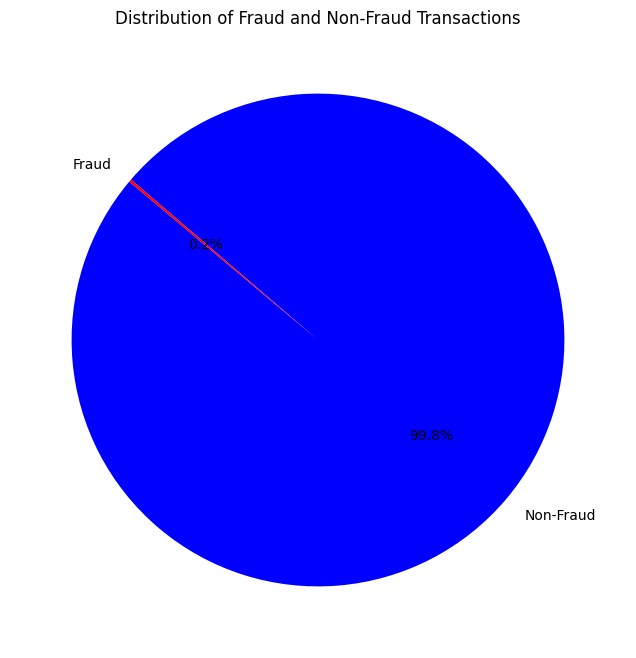

In [7]:
distribution = data['Class'].value_counts(normalize=True)
plt.figure(figsize=(8, 8))
labels = ['Non-Fraud', 'Fraud']
colors = ['blue', 'red']
plt.pie(distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

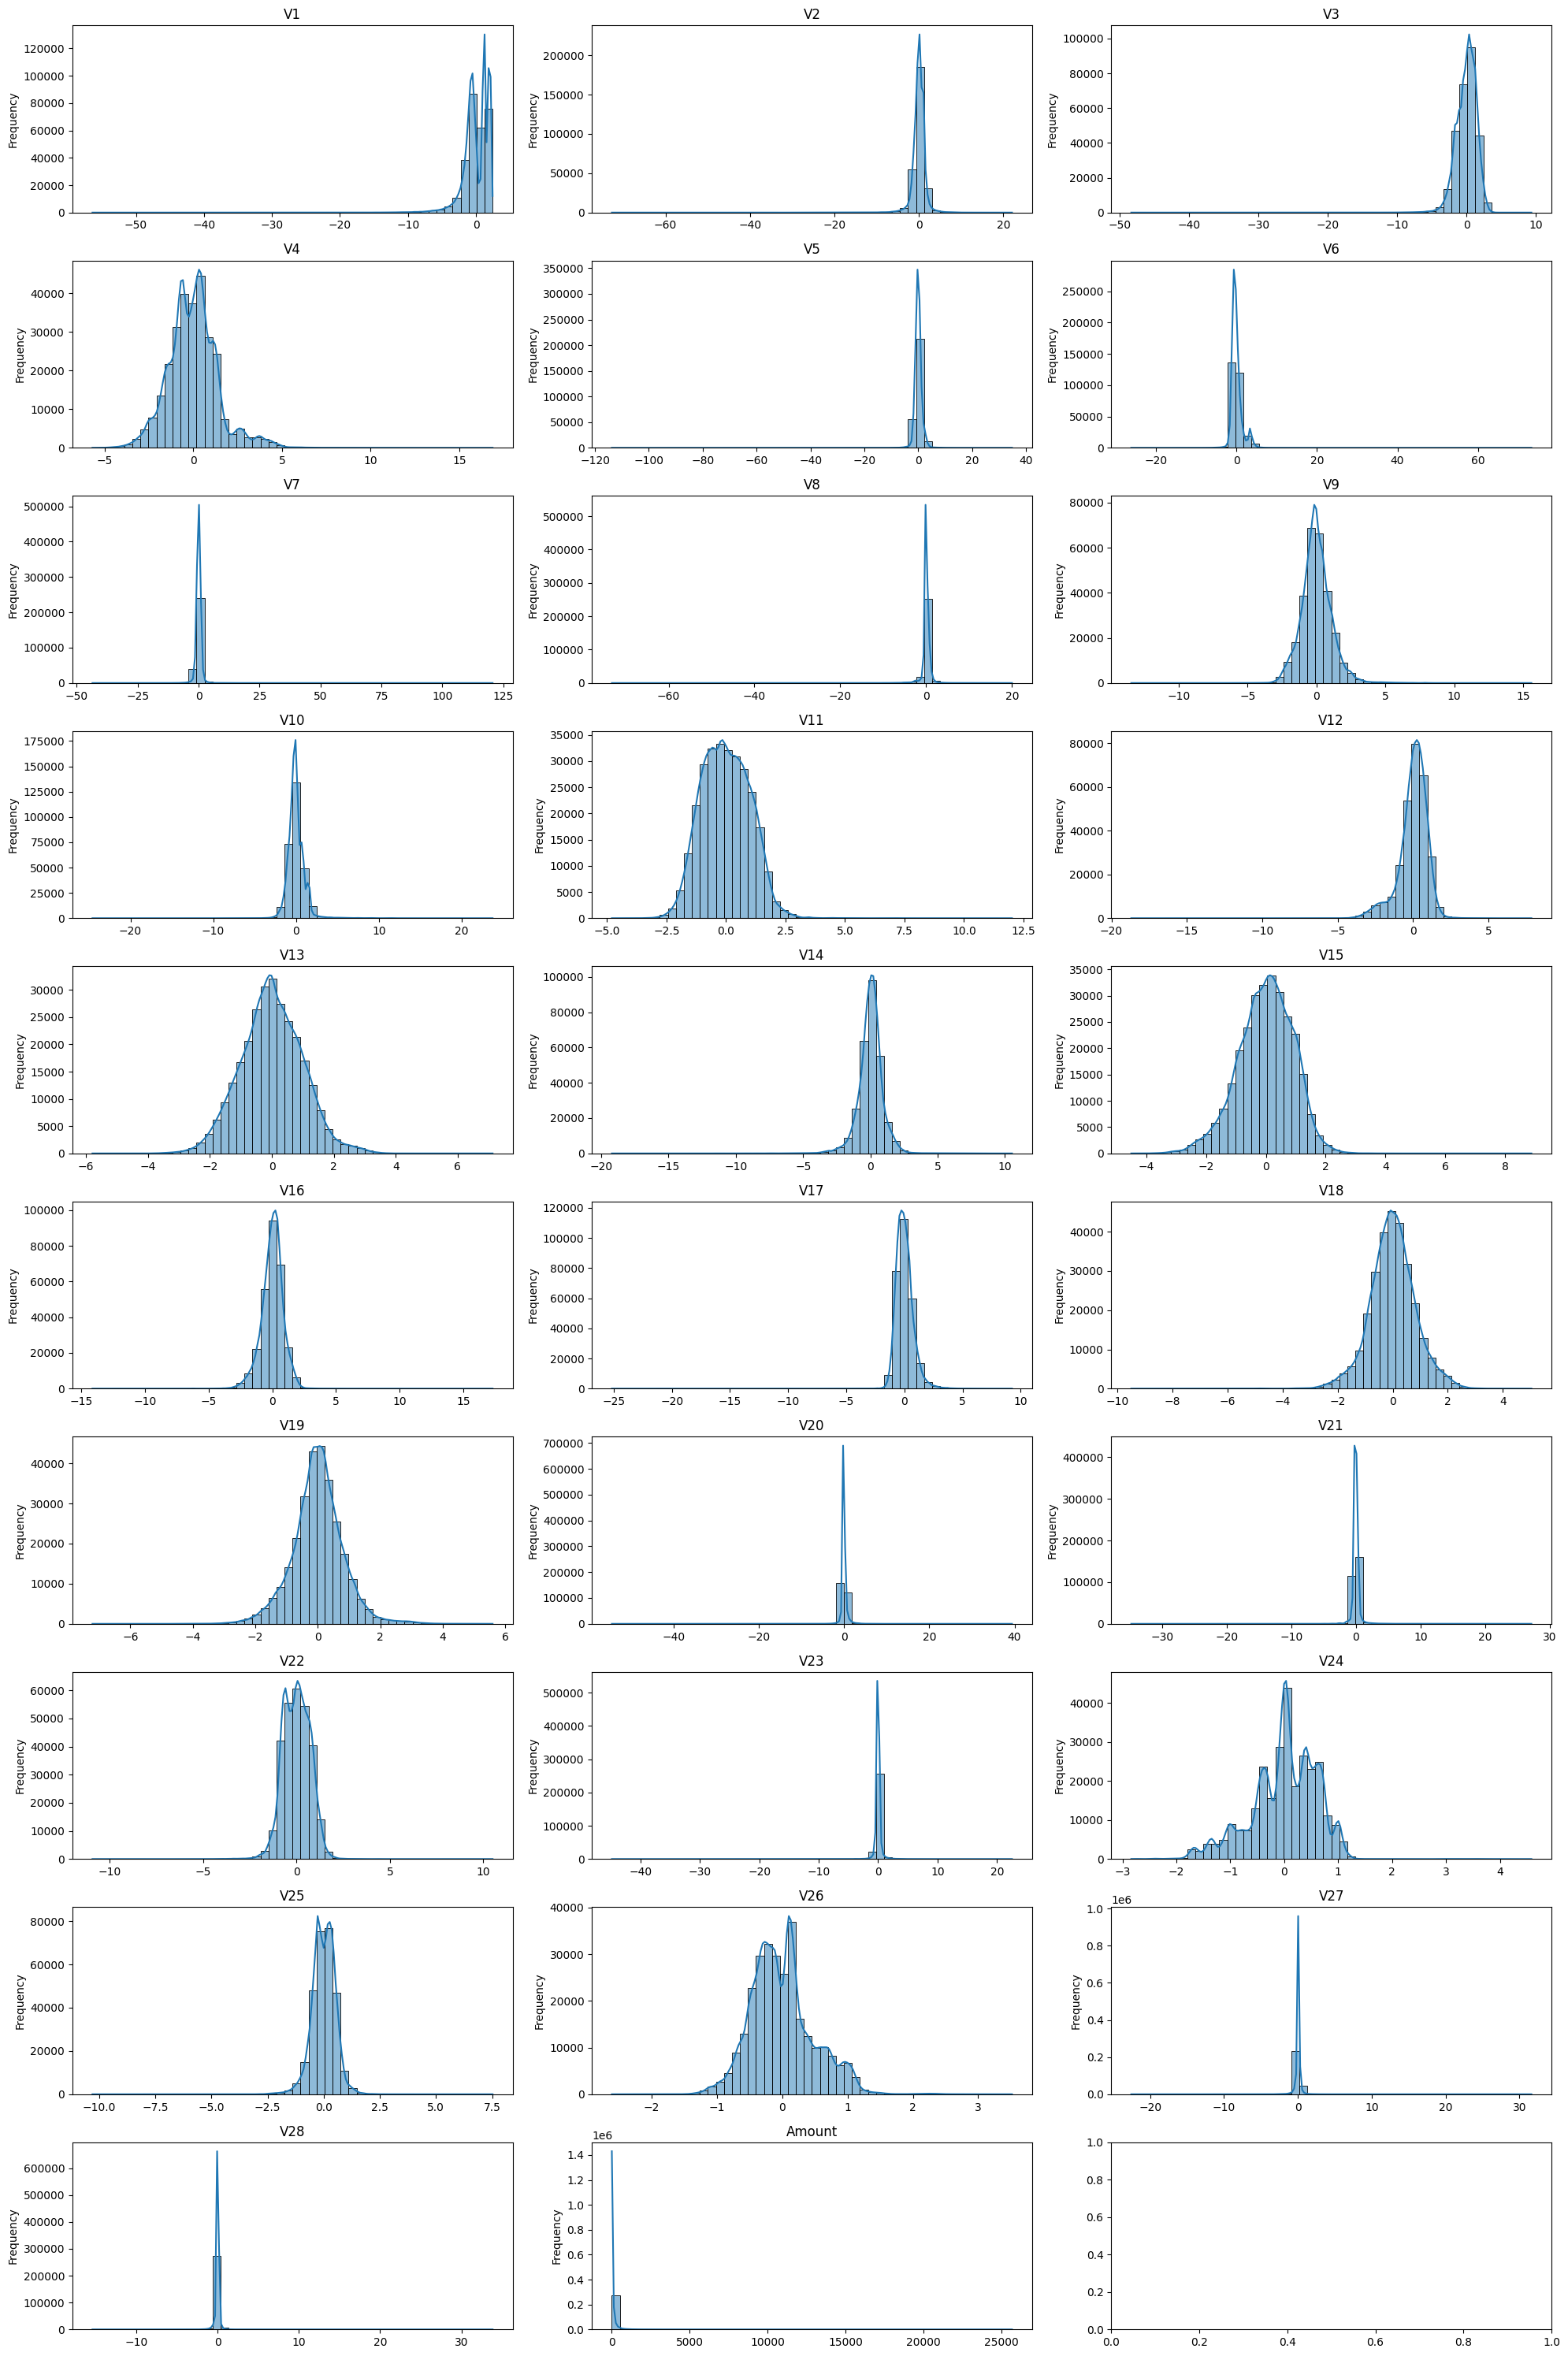

In [8]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 30))

axes = axes.flatten()

for i, col in enumerate(data.columns[1:-1]):
    sns.histplot(data[col], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

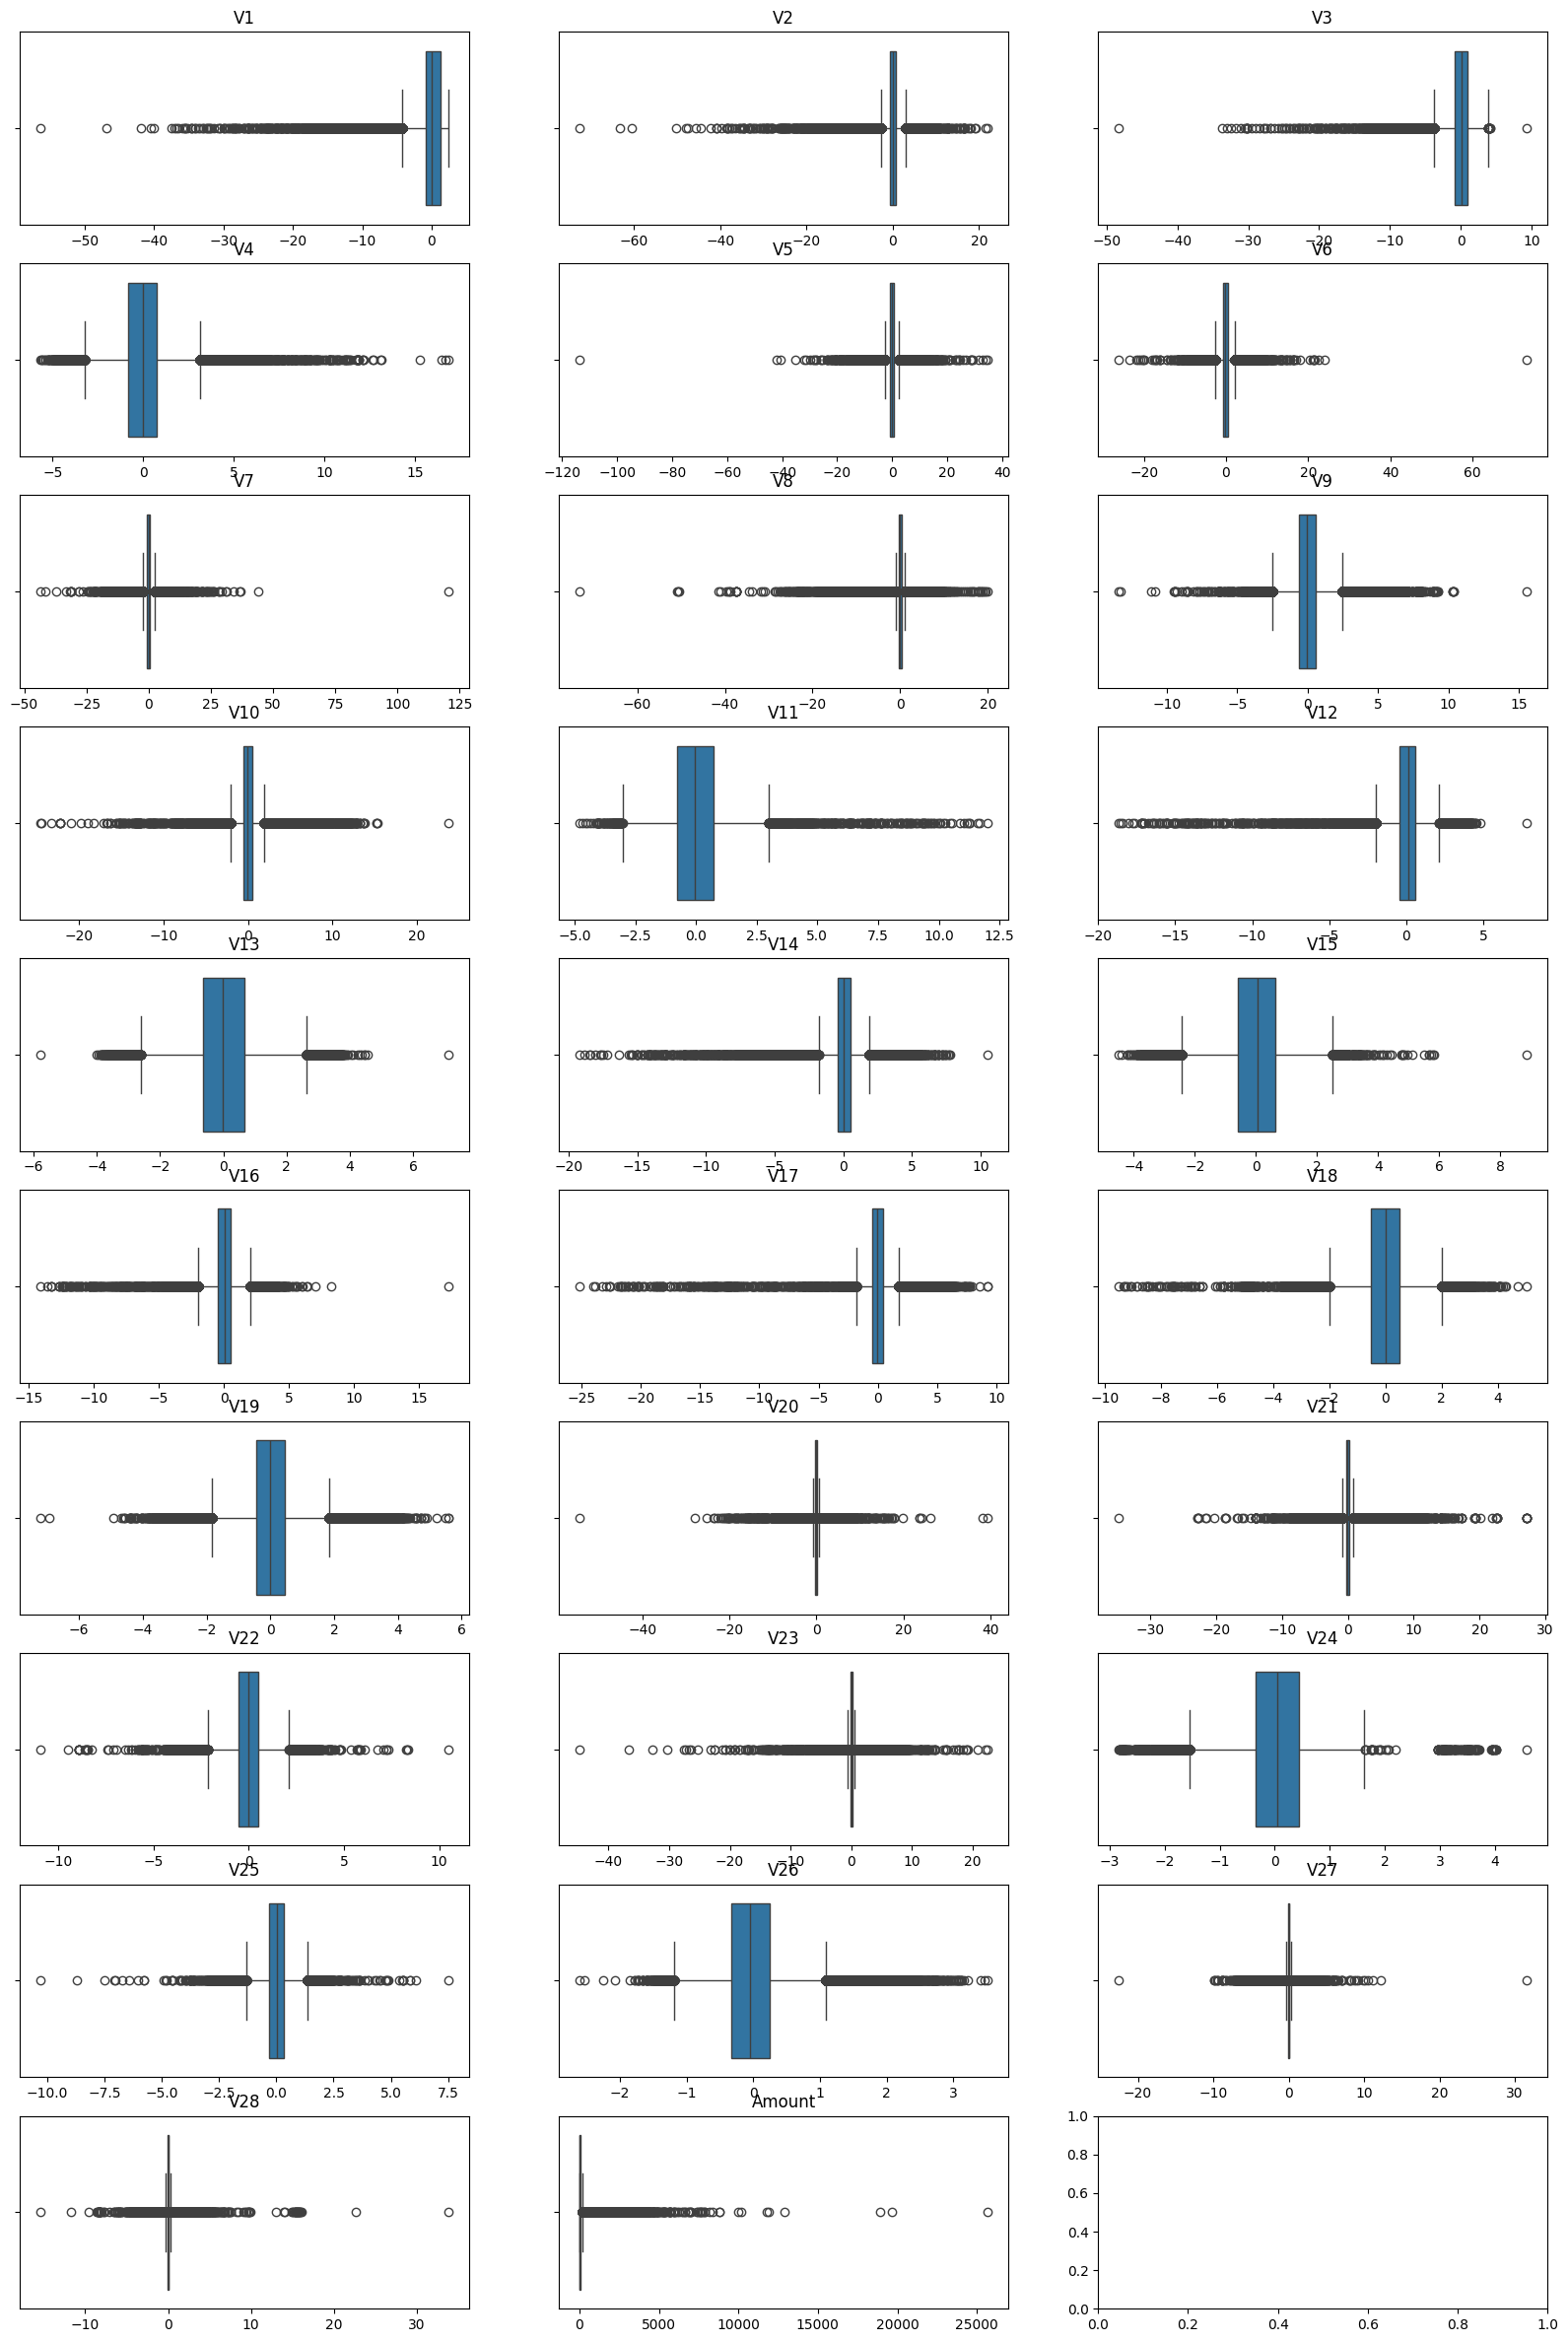

In [9]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 30))

axes = axes.flatten()

for i, col in enumerate(data.columns[1:-1]):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    
plt.show()

Top three columns :
Amount    62556.780583
V1            3.836489
V2            2.726820
dtype: float64


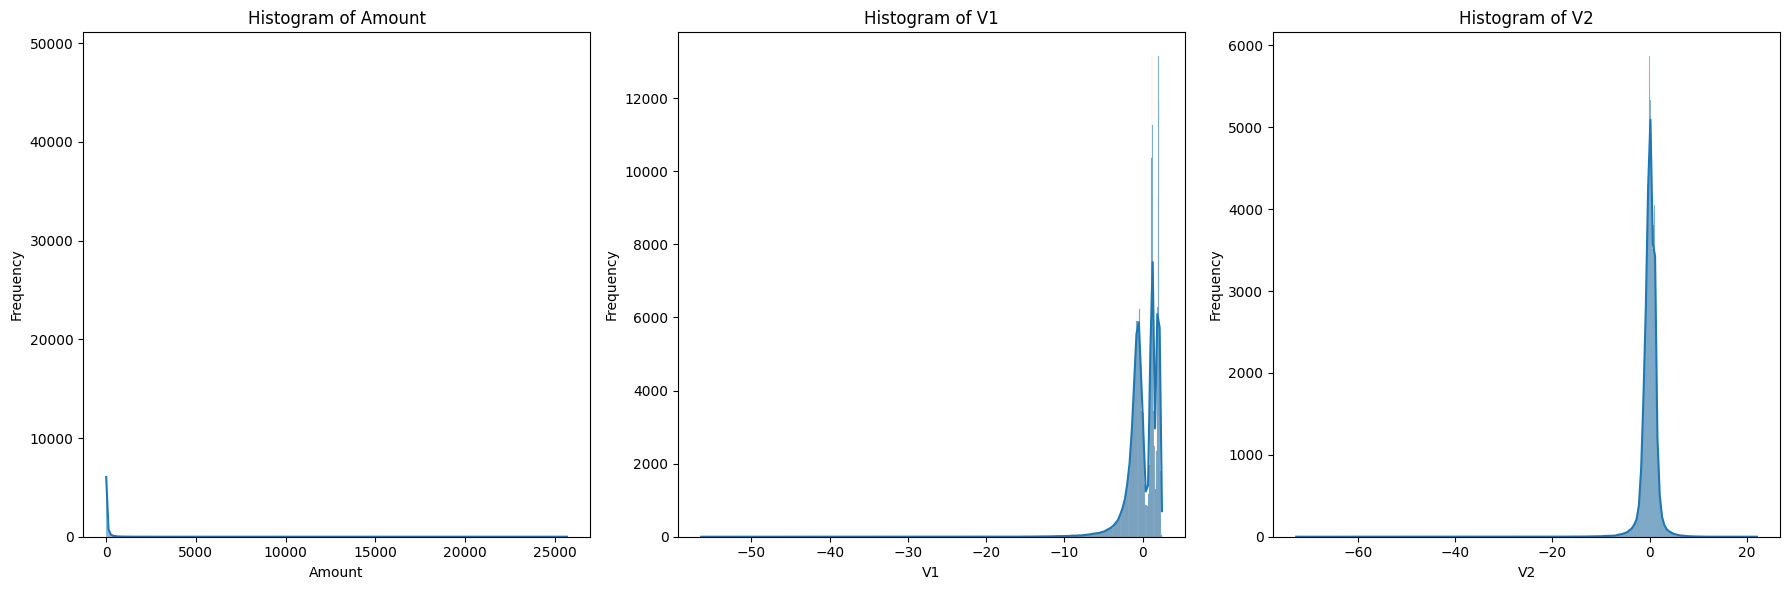

In [10]:
nums_data = data.iloc[:, 1:-1]

variances_nums_data= nums_data.var()

top_three = variances_nums_data.sort_values(ascending=False).head(3)

print("Top three columns :")
print(top_three)

# Plot the top three columns
plt.figure(figsize=(18, 6))

for i, column in enumerate(top_three.index, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

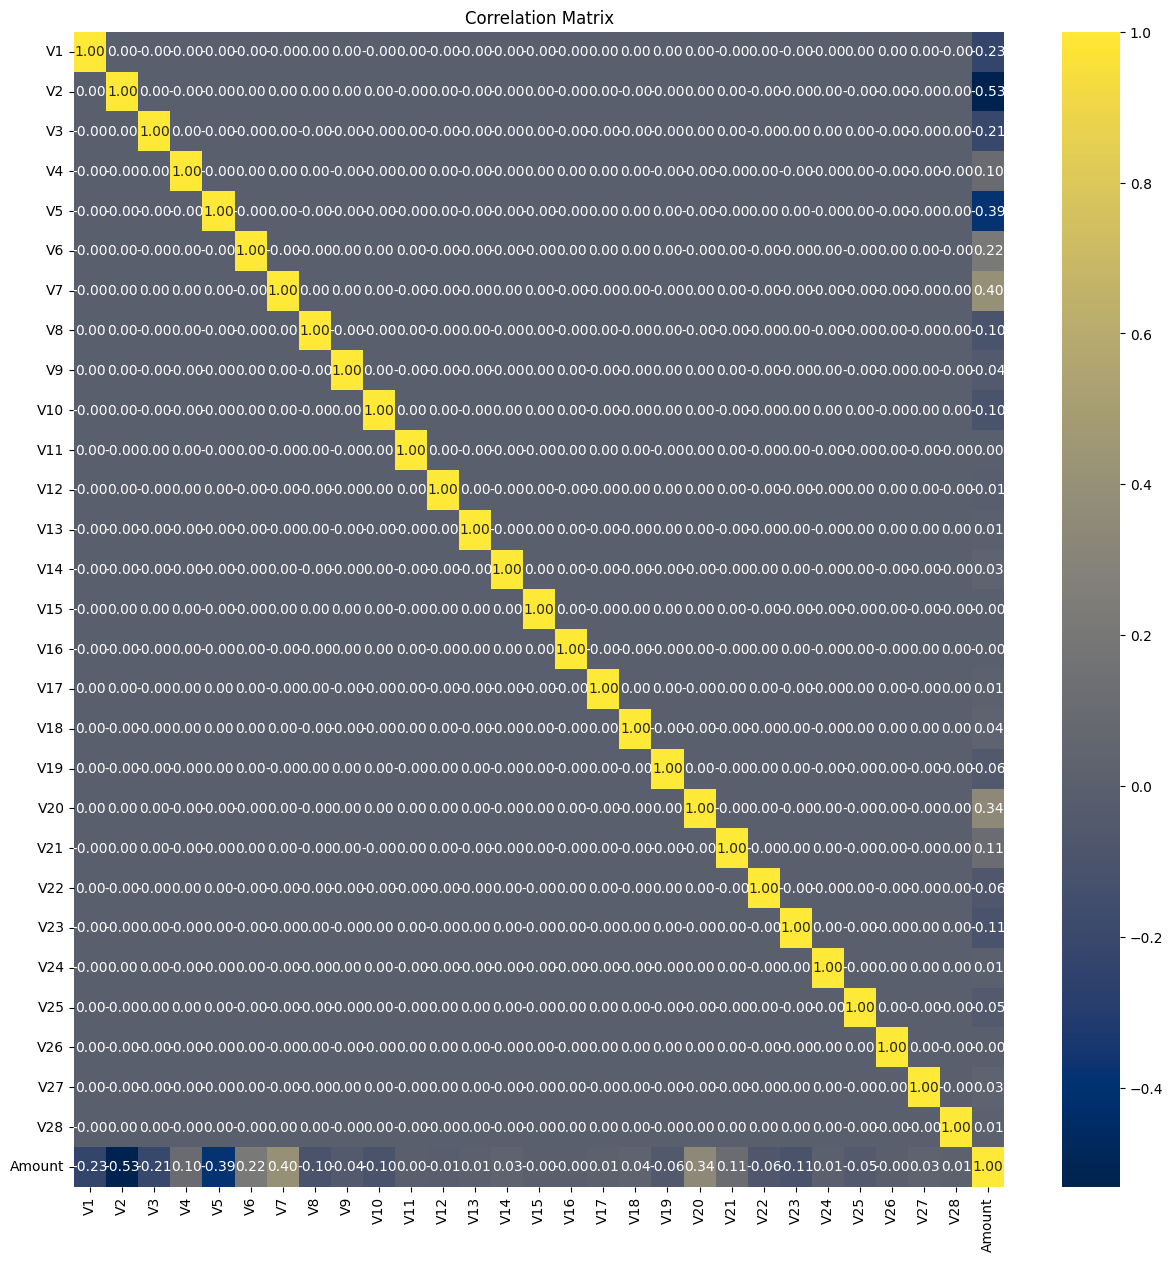

In [11]:
nums_data = data.iloc[:, 1:-1]

correlation_mat = nums_data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_mat, annot=True, cmap="cividis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
fraud_data = data[data["Class"]==1]
fraud_data.shape

(492, 31)

In [13]:
non_fraud_data = data[data["Class"]==0]
non_fraud_data.shape

(284315, 31)

In [14]:
print("Non-Fraud Data Statistics:")
non_fraud_data.describe()

Non-Fraud Data Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284282.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.285259,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.098504,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689399,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [15]:
print("Fraud Data Statistics:")
fraud_data.describe()

Fraud Data Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [16]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px

data = pd.read_csv(r"C:\Users\Essam\Desktop\Dataset6.csv")

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Dashboard"),
    
    html.Label("Select a feature:"),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in data.columns],
        value='Time'  
    ),
    
    dcc.Graph(id='chart1'),
    dcc.Graph(id='chart2')
])

@app.callback(
    [dash.dependencies.Output('chart1', 'figure'),
     dash.dependencies.Output('chart2', 'figure')],
    [dash.dependencies.Input('feature-dropdown', 'value')]
)
def update_charts(selected_feature):
    fig1 = px.histogram(data, x=selected_feature, color='Class', title='Histogram')
    fig2 = px.scatter(data, x='Time', y='Amount', color='Class', title='Scatter Plot')
    return fig1, fig2

if __name__ == '__main__':
    app.run_server(debug=True)

ModuleNotFoundError: No module named 'dash'

In [14]:
print(data.isnull().sum().sum())
null_counts = data.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
columns_with_null

77


V13       22
V18       11
V19       11
Amount    33
dtype: int64

In [15]:
rows_with_null = data[data.isnull().any(axis=1)]

class_counts = rows_with_null['Class'].value_counts()

print("Count of Class = 0 in rows with null values:", class_counts.get(0, 0))
print("Count of Class = 1 in rows with null values:", class_counts.get(1, 0))

Count of Class = 0 in rows with null values: 71
Count of Class = 1 in rows with null values: 1


From thr above we conclude that
1) prsesence of null values with low ratio in data
2) the data need to be scaled due to diffrent distributions betweeen columns
3) the correlation matrix showed that there is no any linear relation between any two column so we can not drop any column

In [16]:
cleaned_data = data.drop(columns=['Time'])

In [17]:
cleaned_data = cleaned_data[(data['Class'] == 1)  | ((data['Class'] == 0) & (~data.isnull().any(axis=1)))]

In [18]:
print(cleaned_data.isnull().sum().sum())
null_counts = cleaned_data.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
columns_with_null

1


V13    1
dtype: int64

In [19]:
mean_v13 = data['V13'].mean()

cleaned_data['V13'].fillna(mean_v13, inplace=True)

In [20]:
print(cleaned_data.isnull().sum().sum())
null_counts = cleaned_data.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
columns_with_null

0


Series([], dtype: int64)

In [21]:
numerical_cols = cleaned_data.drop(columns=['Class'])

scaler = StandardScaler()

cleaned_data[numerical_cols.columns] = scaler.fit_transform(numerical_cols)

In [22]:
print(data.shape)
print(cleaned_data.shape)

(284807, 31)
(284736, 30)


In [23]:
cleaned_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.694200,-0.044071,1.672705,0.973408,-0.245057,0.347096,0.193665,0.082589,0.331289,0.083424,...,-0.024895,0.382928,-0.176892,0.110459,0.246550,-0.392195,0.330867,-0.063773,0.244947,0
1,0.608518,0.161175,0.109741,0.316547,0.043534,-0.061789,-0.063702,0.071206,-0.232373,-0.153320,...,-0.307350,-0.879998,0.162202,-0.561181,0.320656,0.261027,-0.022273,0.044606,-0.342471,0
2,-0.693458,-0.811553,1.169404,0.268254,-0.364508,1.351477,0.639740,0.207324,-1.378634,0.190742,...,0.337662,1.063429,1.456248,-1.138145,-0.628549,-0.288474,-0.137151,-0.181003,1.160637,0
3,-0.493285,-0.112163,1.182452,-0.609729,-0.007417,0.936175,0.192057,0.315968,-1.262453,-0.050434,...,-0.147415,0.007342,-0.304750,-1.941082,1.241841,-0.460240,0.155375,0.186174,0.140521,0
4,-0.591289,0.531530,1.021348,0.284678,-0.294954,0.072028,0.479274,-0.226557,0.744516,0.691686,...,-0.012811,1.100082,-0.220101,0.233202,-0.395220,1.041548,0.543590,0.651760,-0.073409,0


In [24]:
cleaned_data.isnull().sum().sum()

0

In [25]:
X = cleaned_data.drop(columns=['Class'])
y = cleaned_data['Class']

logistic_model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[56851    10]
 [   32    55]]
Precision: 0.8461538461538461
Recall: 0.632183908045977
F1-score: 0.7236842105263158


The baseline model has 72.3 f1 score and this will be our base accuracy for the upcoming methods

In [26]:
X = cleaned_data.drop(columns=['Class'])
y = cleaned_data['Class']

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

print("test accuracies :")
print("")
y_pred_test = model1.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("")
print("-----------------------------------------------------------------")
print("")
print("train accuracies :")
print("")
y_pred_train = model1.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

test accuracies :

Confusion Matrix:
[[95  4]
 [ 9 89]]
Precision: 0.956989247311828
Recall: 0.9081632653061225
F1-score: 0.9319371727748691

-----------------------------------------------------------------

train accuracies :

Confusion Matrix:
[[388   5]
 [ 25 369]]
Precision: 0.9866310160427807
Recall: 0.9365482233502538
F1-score: 0.9609374999999999


In [27]:
test_log_loss = log_loss(y_test, model1.predict_proba(X_test))
print("Test Log Loss:", test_log_loss)

train_log_loss = log_loss(y_train, model1.predict_proba(X_train))
print("Train Log Loss:", train_log_loss)

Test Log Loss: 0.2503807666203564
Train Log Loss: 0.10378443260539837


The undersampling method has a high diffrence between train and test loss which may indicates overfittinf

In [28]:
X = cleaned_data.drop(columns=['Class'])
y = cleaned_data['Class']

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

print("test accuracies :")
print("")
y_pred_test = model2.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("")
print("-----------------------------------------------------------------")
print("")
print("train accuracies :")
print("")
y_pred_train = model2.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


test accuracies :

Confusion Matrix:
[[55425  1346]
 [ 4460 52467]]
Precision: 0.9749874565625406
Recall: 0.9216540481669506
F1-score: 0.9475708867617842

-----------------------------------------------------------------

train accuracies :

Confusion Matrix:
[[222302   5171]
 [ 18023 209294]]
Precision: 0.9758888396708087
Recall: 0.9207142448651002
F1-score: 0.9474989927158644


In [29]:
test_log_loss = log_loss(y_test, model2.predict_proba(X_test))
print("Test Log Loss:", test_log_loss)

train_log_loss = log_loss(y_train, model2.predict_proba(X_train))
print("Train Log Loss:", train_log_loss)

Test Log Loss: 0.13666152906840928
Train Log Loss: 0.13576600144625472


The oversampling method has a good F1 score and the diffrence between the train and test loss is very low which indicates a good generalization